<a href="https://colab.research.google.com/github/zinia94/MachineLearning/blob/main/notebooks/machine-learning/supervised-learning/support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines
You should build a machine learning pipeline using a support vector machine model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [36]:
import pandas as pd
import sklearn.model_selection as skms
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import sklearn.neighbors as knearest

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/mnist.csv")
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train, df_test = skms.train_test_split(df)

print("df size: ", df.shape)
print("df_train size: ", df_train.shape)
print("df_test size: ", df_test.shape)

df size:  (4000, 786)
df_train size:  (3000, 786)
df_test size:  (1000, 786)


In [7]:
df_train.dtypes

id          int64
class       int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 786, dtype: object

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'pixel1'}>,
        <Axes: title={'center': 'pixel2'}>,
        <Axes: title={'center': 'pixel3'}>,
        <Axes: title={'center': 'pixel4'}>,
        <Axes: title={'center': 'pixel5'}>,
        <Axes: title={'center': 'pixel6'}>,
        <Axes: title={'center': 'pixel7'}>,
        <Axes: title={'center': 'pixel8'}>,
        <Axes: title={'center': 'pixel9'}>,
        <Axes: title={'center': 'pixel10'}>,
        <Axes: title={'center': 'pixel11'}>,
        <Axes: title={'center': 'pixel12'}>,
        <Axes: title={'center': 'pixel13'}>,
        <Axes: title={'center': 'pixel14'}>,
        <Axes: title={'center': 'pixel15'}>,
        <Axes: title={'center': 'pixel16'}>,
        <Axes: title={'center': 'pixel17'}>,
        <Axes: title={'center': 'pixel18'}>,
        <Axes: title={'center': 'pixel19'}>,
        <Axes: title={'center': 'pixel20'}>,
        <Axes: title={'cen

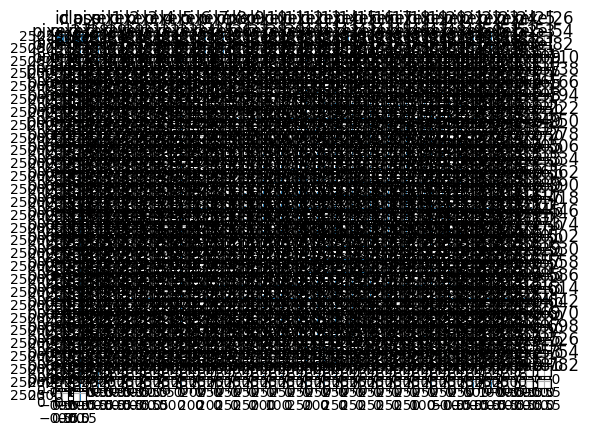

In [8]:
df_train.hist()

<Axes: >

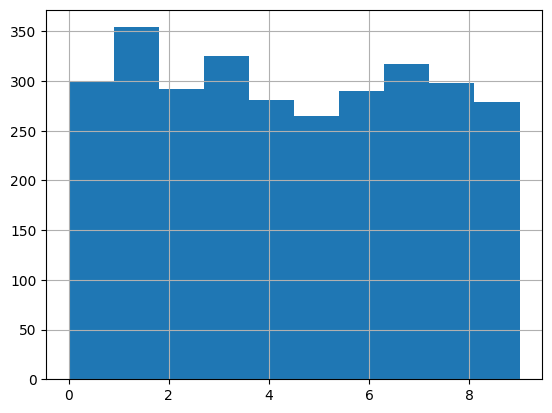

In [9]:
df_train['class'].hist()

In [10]:
x_train = df_train.drop("class", axis= 1)
y_train = df_train["class"]
x_test = df_test.drop("class", axis= 1)
y_test = df_test["class"]

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (3000, 785)
y_train size:  (3000,)
x_test size:  (1000, 785)
y_test size:  (1000,)


In [11]:
model = sklearn.svm.SVC(C=1.0, kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [12]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
(y_predicted, accuracy)

(array([1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1, 1, 1, 8, 1, 1, 8, 8, 8, 8, 8, 1,
        8, 1, 8, 1, 1, 1, 8, 1, 1, 1, 1, 1, 8, 8, 8, 1, 8, 1, 8, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 8, 1, 1, 1, 8, 1,
        1, 1, 8, 1, 1, 8, 1, 1, 8, 8, 1, 1, 1, 1, 0, 1, 1, 8, 8, 8, 1, 1,
        8, 8, 1, 1, 1, 1, 8, 1, 1, 1, 8, 0, 1, 1, 1, 1, 0, 8, 8, 1, 1, 1,
        1, 8, 1, 1, 1, 1, 1, 8, 8, 8, 1, 1, 1, 1, 8, 1, 1, 1, 8, 1, 1, 8,
        1, 1, 1, 8, 8, 1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1, 8, 0, 1, 1, 1, 1,
        8, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 8, 1, 1, 8,
        1, 1, 8, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 8, 8, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1,
        1, 1, 1, 1, 1, 8, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 1, 1,
        0, 1, 1, 1, 8, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 1, 1,
        1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1,
        1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 

In [13]:
model2 = sklearn.svm.SVC(C=2.0, kernel='rbf')
model2.fit(x_train, y_train)

SVC(C=2.0)

In [14]:
y_predicted2 = model2.predict(x_test)
accuracy2 = sklearn.metrics.accuracy_score(y_test, y_predicted2)
(y_predicted2, accuracy2)

(array([1, 3, 8, 1, 8, 0, 8, 1, 1, 6, 1, 1, 1, 8, 1, 8, 8, 8, 7, 0, 8, 1,
        0, 1, 8, 7, 3, 7, 8, 1, 1, 1, 0, 0, 8, 8, 8, 1, 8, 7, 8, 1, 1, 8,
        0, 7, 7, 7, 3, 3, 3, 1, 7, 1, 7, 1, 8, 7, 1, 1, 8, 1, 0, 6, 8, 1,
        1, 3, 8, 3, 7, 8, 1, 1, 8, 8, 8, 7, 1, 1, 0, 7, 8, 1, 8, 0, 6, 1,
        0, 8, 7, 1, 2, 3, 7, 1, 3, 6, 8, 0, 1, 1, 0, 3, 0, 8, 0, 3, 3, 7,
        1, 8, 3, 3, 6, 1, 1, 0, 7, 8, 7, 3, 1, 1, 8, 6, 7, 1, 8, 2, 1, 8,
        1, 6, 7, 8, 0, 7, 1, 1, 1, 7, 8, 8, 3, 2, 7, 3, 8, 0, 3, 1, 1, 1,
        8, 1, 1, 0, 1, 7, 0, 1, 3, 0, 1, 6, 1, 1, 8, 1, 1, 1, 8, 1, 3, 0,
        1, 1, 8, 7, 7, 1, 1, 3, 1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 8, 8, 7, 3,
        2, 1, 1, 1, 6, 7, 1, 1, 6, 8, 8, 1, 1, 8, 1, 1, 1, 1, 8, 3, 3, 1,
        3, 1, 4, 0, 1, 8, 0, 1, 1, 3, 1, 8, 8, 1, 1, 1, 1, 7, 0, 8, 1, 7,
        0, 1, 1, 3, 8, 1, 1, 0, 1, 8, 8, 6, 3, 1, 1, 3, 1, 8, 8, 8, 1, 7,
        1, 1, 1, 8, 1, 1, 0, 1, 1, 8, 6, 1, 7, 7, 1, 1, 1, 1, 1, 8, 3, 1,
        7, 1, 1, 1, 8, 8, 8, 3, 0, 1, 

In [34]:
model3 = sklearn.svm.SVC(C=200.0, kernel='linear')
model3.fit(x_train, y_train)
y_predicted3 = model3.predict(x_test)
accuracy3 = sklearn.metrics.accuracy_score(y_test, y_predicted3)
(y_predicted3, accuracy3)

(array([4, 5, 8, 6, 8, 0, 5, 8, 7, 6, 3, 1, 1, 3, 2, 8, 3, 3, 7, 0, 9, 3,
        0, 1, 1, 7, 9, 9, 3, 1, 7, 4, 0, 5, 5, 8, 3, 2, 5, 7, 6, 6, 1, 8,
        0, 7, 7, 4, 3, 3, 8, 6, 7, 7, 7, 1, 1, 7, 2, 3, 7, 1, 0, 6, 9, 2,
        2, 2, 6, 8, 7, 3, 6, 8, 1, 5, 5, 7, 7, 2, 0, 7, 6, 1, 5, 0, 6, 2,
        2, 5, 9, 2, 6, 3, 7, 1, 8, 0, 4, 0, 8, 8, 0, 8, 0, 9, 0, 3, 8, 9,
        9, 3, 3, 3, 6, 7, 6, 0, 7, 1, 7, 3, 1, 8, 8, 6, 7, 5, 2, 6, 3, 5,
        5, 6, 4, 4, 0, 7, 4, 3, 2, 7, 8, 3, 5, 2, 7, 5, 5, 0, 5, 2, 4, 1,
        2, 4, 1, 0, 2, 9, 0, 6, 3, 5, 8, 6, 1, 4, 2, 2, 1, 2, 5, 2, 3, 0,
        3, 4, 7, 9, 7, 1, 8, 3, 1, 1, 1, 1, 5, 5, 2, 9, 2, 8, 8, 3, 9, 3,
        2, 3, 2, 0, 6, 3, 7, 1, 6, 0, 1, 1, 8, 9, 1, 1, 2, 1, 7, 3, 5, 1,
        4, 4, 4, 0, 8, 9, 0, 2, 9, 5, 1, 5, 8, 1, 2, 8, 9, 7, 0, 9, 8, 2,
        0, 9, 7, 9, 2, 1, 8, 0, 0, 8, 8, 6, 3, 5, 3, 4, 8, 4, 8, 5, 1, 9,
        5, 1, 7, 3, 2, 8, 0, 6, 4, 4, 6, 1, 9, 7, 5, 8, 6, 3, 8, 9, 3, 5,
        4, 5, 1, 1, 9, 5, 6, 2, 0, 1, 

In [42]:
model4 = knearest.KNeighborsClassifier(n_neighbors=1)
model4.fit(x_train, y_train)
y_predicted4 = model4.predict(x_test)
accuracy4 = sklearn.metrics.accuracy_score(y_test, y_predicted4)
(y_predicted4, accuracy4)

(array([4, 5, 8, 6, 8, 0, 8, 0, 7, 6, 5, 1, 1, 3, 1, 8, 3, 3, 7, 0, 9, 1,
        0, 1, 1, 7, 9, 9, 3, 1, 1, 4, 0, 9, 5, 4, 5, 2, 5, 7, 6, 9, 5, 8,
        0, 7, 7, 9, 3, 2, 3, 9, 7, 7, 7, 1, 1, 7, 2, 3, 7, 1, 0, 6, 9, 7,
        7, 2, 6, 3, 7, 5, 6, 7, 1, 5, 5, 7, 3, 1, 0, 9, 6, 1, 5, 0, 0, 2,
        2, 3, 7, 2, 6, 3, 7, 1, 3, 0, 4, 0, 1, 3, 0, 8, 0, 9, 0, 3, 0, 9,
        9, 7, 7, 3, 6, 7, 6, 0, 7, 1, 7, 3, 1, 1, 8, 6, 4, 8, 2, 2, 1, 5,
        5, 6, 9, 9, 0, 7, 9, 9, 2, 7, 8, 4, 5, 8, 7, 5, 9, 0, 3, 4, 4, 1,
        2, 1, 1, 0, 4, 9, 0, 6, 3, 0, 8, 6, 1, 9, 2, 2, 1, 4, 5, 4, 7, 0,
        5, 6, 7, 9, 7, 1, 9, 3, 1, 1, 1, 1, 5, 5, 6, 9, 2, 8, 8, 3, 9, 3,
        4, 8, 2, 6, 6, 3, 7, 1, 6, 0, 1, 5, 9, 9, 1, 1, 8, 1, 4, 3, 5, 1,
        4, 2, 4, 0, 5, 9, 0, 1, 9, 5, 1, 8, 5, 1, 2, 9, 9, 9, 2, 9, 8, 2,
        0, 4, 5, 9, 2, 4, 1, 0, 1, 8, 8, 6, 3, 3, 3, 4, 9, 4, 5, 5, 1, 4,
        3, 1, 7, 3, 8, 3, 0, 6, 4, 4, 4, 1, 9, 7, 5, 5, 5, 3, 3, 9, 3, 3,
        9, 5, 1, 1, 5, 5, 6, 9, 0, 1, 